In [1]:
#importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#block out warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### Columns description:

Countries_Num: Numeric code representing the 8 countries in the West African Economic and Monetary Union (ranges from 1 to 8).

id: An identifier for each bank in the dataset.

Countries: Categorical variable indicating the names of the countries in the West African Economic and Monetary Union.

Banks: Categorical variable representing the names of the banks within the specified countries.

Year: Integer variable indicating the year in which the data was recorded.

RIR (Risk Index Rating): A measure assessing the level of risk associated with financial institutions.

SFS (Solvency and Financial Stability): A metric indicating the financial health and stability of the banks.

INF (Inflation Rate): Represents the inflation rate, a measure of the general rise in prices over a period of time.

ERA (Economic Risk Assessment): An evaluation of the potential economic risks within the banking sector.

INL (Internationalization Level): Indicates the extent to which banks are involved in international activities.

Zscore: A metric used as a measure of a bank's financial health and the likelihood of it going bankrupt in the next two years.

DEBT (Debt Level): Represents the amount of debt held by the banks.

SIZE: Represents the size of the banks, typically measured by total assets or other relevant financial metrics.

CC (Capital Adequacy): A measure of a bank's capital in relation to its risk-weighted assets.

GE (Governance and Ethics): Evaluates the governance practices and ethical standards within the banking institutions.

PS (Profitability and Sustainability): Assesses the profitability and sustainability of the banks.

RQ (Regulatory Compliance): Measures the extent to which banks adhere to regulatory requirements.

RL (Liquidity Risk): Evaluates the risk associated with a bank's ability to meet its short-term obligations.

VA (Value Added): Indicates the value added by the banks to the overall economic environment.

In [3]:
#loading the dataset
uemoa_df = pd.read_csv("uemoa_banking.csv", encoding = 'utf-8')
uemoa_df.head()

,Countries_Num,id,Countries,Banks,Year,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
0,1,1,Bénin,Banque Atlantique Bénin,2013,3.836593,26.861971,0.428889,3.196428,12.076596,0.973123,18.503746,12.222694,24.64455,36.96682,58.29384,37.44076,34.27230,55.86855
1,1,1,Bénin,Banque Atlantique Bénin,2014,5.599992,29.965430,-0.548758,3.045024,8.884912,1.098355,22.282075,12.271219,29.80769,36.05769,47.14286,31.25000,36.05769,57.14286
2,1,1,Bénin,Banque Atlantique Bénin,2015,4.266334,30.984761,0.218786,2.394557,8.583933,0.649069,30.900230,12.511530,33.17308,30.28846,45.23809,30.76923,33.65385,58.62069
3,1,1,Bénin,Banque Atlantique Bénin,2016,4.580100,29.832095,-0.794050,3.712403,5.720476,0.846807,35.923350,12.599141,34.13462,33.65385,47.14286,30.28846,30.76923,60.09852
4,1,1,Bénin,Banque Atlantique Bénin,2017,7.329021,28.630991,1.769412,3.833422,6.256669,0.599062,39.598463,12.706508,33.17308,26.44231,47.14286,33.17308,30.28846,58.12808


In [4]:
#checking for null values in the dataset
uemoa_df.isnull().sum()

Countries_Num    0
id               0
Countries        0
Banks            0
Year             0
RIR              0
SFS              0
INF              0
ERA              0
INL              0
Zscore           0
DEBT             0
SIZE             0
CC               0
GE               0
PS               0
RQ               0
RL               0
VA               0
dtype: int64

In [5]:
#shape of the dataset
uemoa_df.shape

(742, 19)

In [6]:
# Exploring basic statistics
metrics = ['RIR', 'SFS', 'INF', 'ERA', 'INL', 'Zscore', 'DEBT', 'SIZE', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']
uemoa_df[metrics].describe()

,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.711618,31.965249,0.524620,9.766718,11.652364,2.967964,38.780738,12.077644,37.292780,26.747784,23.891205,35.432019,32.653598,41.074591
std,4.114070,8.239127,1.269270,18.965490,10.885343,5.123174,11.664036,1.114687,12.589451,10.261396,14.741995,9.474103,10.138651,11.071831
min,-23.137938,15.829639,-3.233389,-179.747455,0.000000,-47.777093,18.503746,8.677440,13.461540,8.530806,3.773585,13.942310,6.250000,18.309860
25%,3.367054,26.927042,-0.258090,4.166364,4.656050,1.482417,30.666445,11.359607,27.403850,18.009480,12.857140,28.365390,27.403850,33.004920
50%,4.266334,29.918364,0.685881,7.460494,8.895584,2.149078,36.494147,12.156868,33.173080,26.442310,17.061610,34.134620,30.769230,38.423650
75%,5.599992,37.793417,1.318153,11.520829,14.951115,3.468952,44.508726,12.891855,49.038460,35.096150,38.571430,43.269230,36.057690,53.490507
max,7.578020,51.682209,2.967604,179.056370,79.606396,39.380715,65.870037,14.582210,58.653850,50.961540,58.293840,52.606640,53.846150,60.098520


## Summary explanation of the basic statistics for the selected metrics:

1. **Risk Index Rating (RIR):**
   - **Mean (3.71):** On average, the risk index rating for banks in the dataset is moderate.
   - **Standard Deviation (4.11):** There is a significant variability in risk index ratings, suggesting a diverse risk profile among banks.
   - **Range (-23.14 to 7.58):** The risk index ratings span a wide range, including negative values, indicating diverse risk levels.

2. **Solvency and Financial Stability (SFS):**
   - **Mean (31.97):** The average solvency and financial stability score is around 32, indicating a relatively stable financial position.
   - **Standard Deviation (8.24):** There is moderate variability in solvency and financial stability scores among the banks.
   - **Range (15.83 to 51.68):** The scores vary between 15.83 and 51.68, showcasing diversity in financial stability.

3. **Inflation Rate (INF):**
   - **Mean (0.52):** The average inflation rate is relatively low, indicating a generally stable economic environment.
   - **Standard Deviation (1.27):** There is some variability in inflation rates across the dataset.
   - **Range (-3.23 to 2.97):** The inflation rates range from negative values to positive values, reflecting economic conditions.

4. **Economic Risk Assessment (ERA):**
   - **Mean (9.77):** The average economic risk assessment is around 9.77, suggesting a moderate level of economic risk within the banking sector.
   - **Standard Deviation (18.97):** There is a wide range of economic risk assessments, indicating diverse economic conditions across banks.
   - **Range (-179.75 to 179.06):** The assessments span a broad range, including negative values, indicating significant economic risk variations.

5. **Internationalization Level (INL):**
   - **Mean (11.65):** On average, banks have an internationalization level of approximately 11.65, suggesting a moderate involvement in international activities.
   - **Standard Deviation (10.89):** There is considerable variation in the extent of internationalization among banks.
   - **Range (0.00 to 79.61):** The internationalization levels vary from zero to relatively high values.

6. **Zscore:**
   - **Mean (2.97):** The average Z-score is positive, indicating overall financial health.
   - **Standard Deviation (5.12):** There is considerable variability in Z-scores, suggesting diverse financial health among banks.
   - **Range (-47.78 to 39.38):** The Z-scores span a wide range, including negative values, indicating potential financial distress for some banks.

7. **Debt Level (DEBT):**
   - **Mean (38.78):** The average debt level is relatively high at 38.78.
   - **Standard Deviation (11.66):** There is significant variability in debt levels among banks.
   - **Range (18.50 to 65.87):** The debt levels vary widely, with some banks having lower debt and others having higher debt.

8. **Size of Banks (SIZE):**
   - **Mean (12.08):** The average size of banks is around 12.08, suggesting moderate-sized institutions.
   - **Standard Deviation (1.11):** There is relatively low variability in the size of banks.
   - **Range (8.68 to 14.58):** The sizes of banks are within a narrow range, indicating a relatively homogeneous distribution.

9. **Capital Adequacy (CC):**
   - **Mean (37.29):** The average capital adequacy ratio is 37.29, indicating a generally strong capital position.
   - **Standard Deviation (12.59):** There is notable variability in capital adequacy ratios, suggesting differences in capital strength.
   - **Range (13.46 to 58.65):** The capital adequacy ratios vary widely, reflecting diverse capital positions.

These summaries provide insights into the central tendency, variability, and distribution of key metrics in the dataset, helping to understand the overall characteristics of the banking sector in the UEMOA countries.

#### Correlation matrix for the metrics

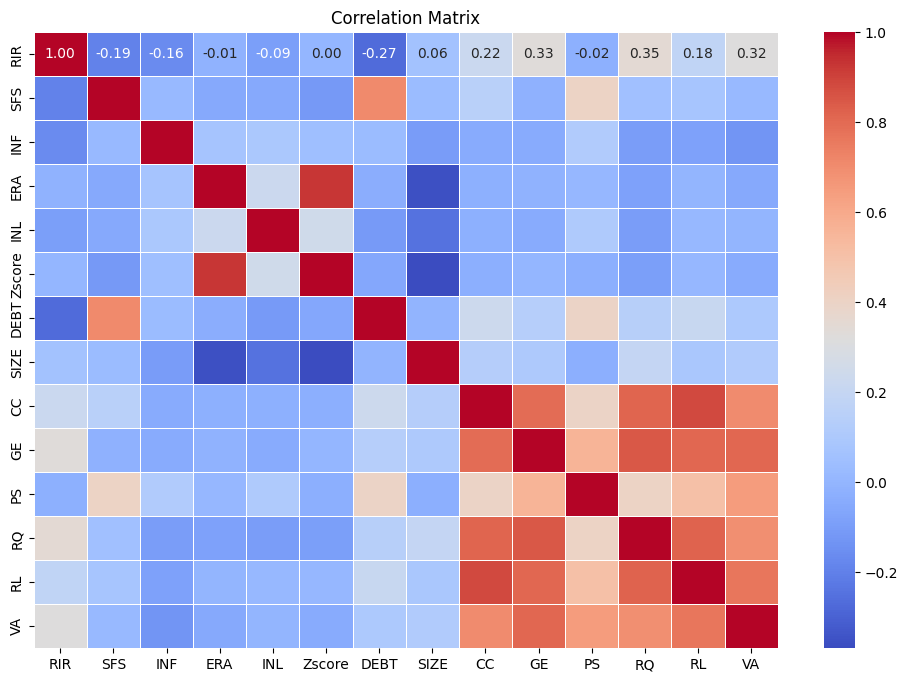

In [7]:
# Calculate the correlation matrix
correlation_matrix = uemoa_df[metrics].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


#### Box plot to visualize distribution of metrics

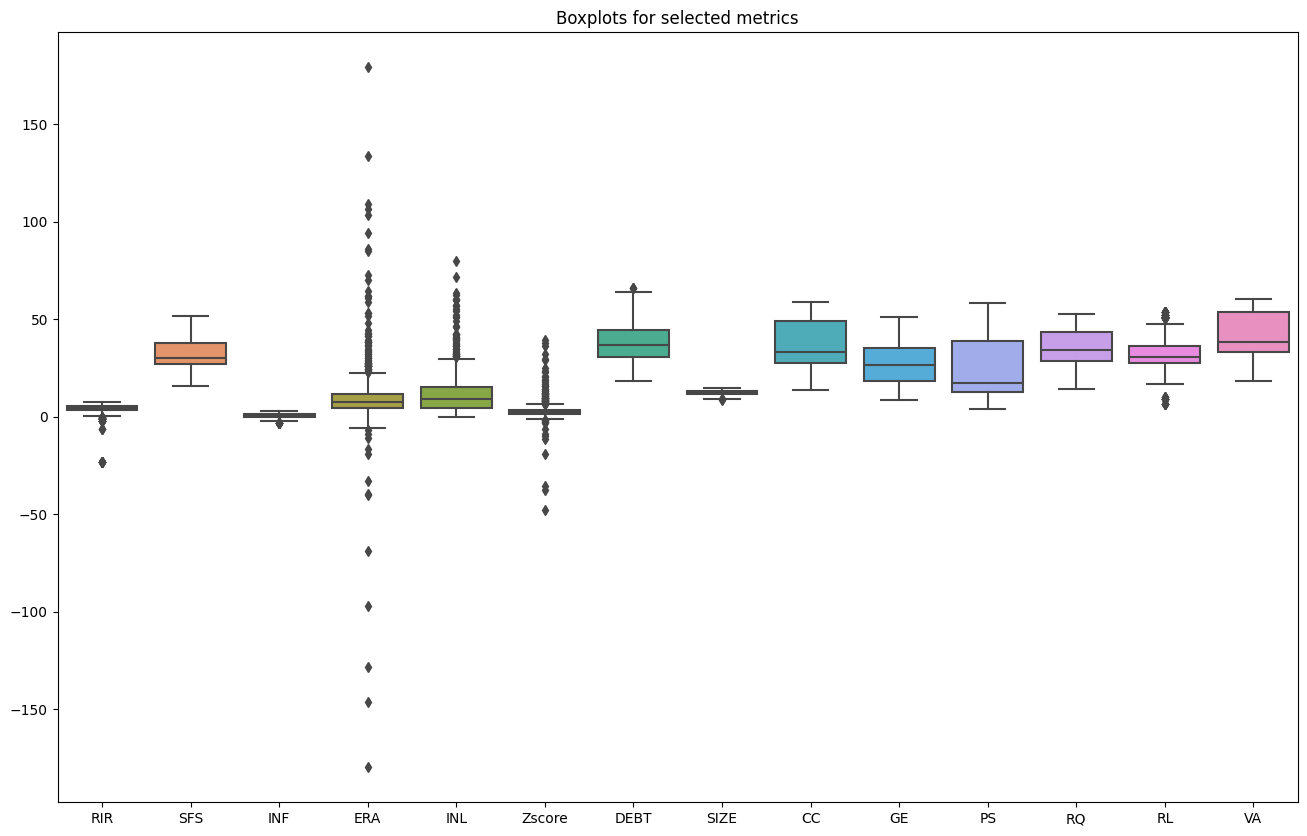

In [8]:
# Visualize the distribution of selected metrics using boxplots
plt.figure(figsize=(16, 10))
sns.boxplot(data=uemoa_df[metrics], orient='v')
plt.title('Boxplots for selected metrics')
plt.show()



- **Economic Risk Assessment (ERA):**
  - The Economic Risk Assessment metric exhibits the highest number of outliers, both on the positive and negative sides of the box plot. This suggests significant variations in the evaluation of potential economic risks within the banking sector. Outliers may indicate extreme economic conditions in certain years or specific countries, impacting the overall risk assessment.

- **Inflation Rate (INF):**
  - The Inflation Rate metric shows a few outliers on the positive end of the box plot. These outliers could be attributed to exceptional economic circumstances in specific years or countries, resulting in unusually high inflation rates. It's essential to investigate these instances further to understand the economic factors contributing to the outliers.

- **Zscore:**
  - Zscore exhibits outliers on both ends of the box plot, with a higher concentration on the positive side. Outliers on the positive side may indicate financial institutions with exceptionally strong financial health, possibly due to robust business strategies or prudent financial management. On the negative side, outliers may highlight banks facing financial challenges, warranting a closer examination of their financial structures.

- **Risk Index Rating (RIR):**
  - Risk Index Rating displays a few outliers on the negative side of the box plot. These outliers may represent banks with unusually high-risk profiles, potentially influenced by economic downturns, regulatory issues, or other factors. Investigating these outliers can provide insights into specific risks affecting certain banks.

- **Liquidity Risk (RL):**
  - Liquidity Risk has a few outliers, indicating variations in a bank's ability to meet short-term obligations. Outliers may be linked to specific events such as economic crises or changes in banking regulations. Understanding the circumstances surrounding these outliers is crucial for assessing the liquidity resilience of individual banks.

- **Other Metrics:**
  - The remaining metrics appear to conform within the box plots, with very few or no outliers. This suggests a general consistency in the values of these metrics across the dataset. Any absence of outliers in these metrics implies a relatively stable and uniform performance within the banking sector for those specific aspects.

By identifying and understanding the outliers in each metric, stakeholders can gain valuable insights into the factors influencing the financial and economic dynamics of the banking institutions in the West African Economic and Monetary Union (UEMOA) countries. Further analysis and contextual information may be required to interpret the outliers accurately.

#### Chart for Risk Index Rating(RIR) vs Years

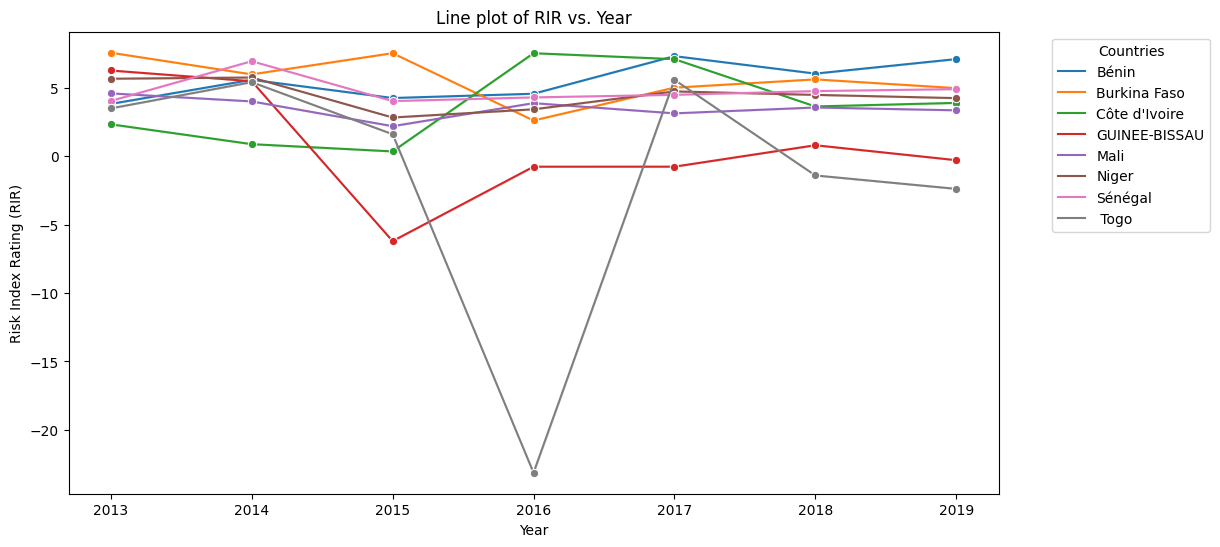

In [9]:
# Line plot of Risk Index Rating (RIR) vs.Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=uemoa_df, y='RIR', x='Year', hue='Countries', marker = 'o')
plt.title('Line plot of RIR vs. Year')
plt.ylabel('Risk Index Rating (RIR)')
plt.xlabel('Year')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The majority of financial institutions across various countries exhibit a positive Risk Index Rating (RIR), with values predominantly falling within the favorable range of 0 to 10. However, an intriguing anomaly arises in the year 2015, particularly noticeable in Guinea-Bissau, where the RIR experiences a notable downturn, plunging into negative territory, reaching approximately -6. This unexpected deviation can be plausibly attributed to an acceleration in the political crisis that engulfed the nation during that period.

Similarly, Mali displays a significant deviation in its RIR during the same year, plummeting to the negative 20s. This stark decline in RIR for Mali could be correlated with the deteriorating security situation prevailing in the country at that specific time. The pronounced negative RIR values suggest heightened risks and uncertainties, possibly stemming from adverse geopolitical conditions, which in turn can impact the stability and risk profile of the financial institutions within the country.

These anomalies underscore the sensitivity of Risk Index Ratings to external factors, emphasizing the importance of considering broader socio-political contexts when interpreting deviations in financial risk assessments. Such insights not only contribute to a more nuanced understanding of the financial landscape but also provide valuable context for decision-makers assessing the resilience and risk management capabilities of financial institutions operating in challenging environments.

#### Chart for Inflation Rate (INF) vs Years

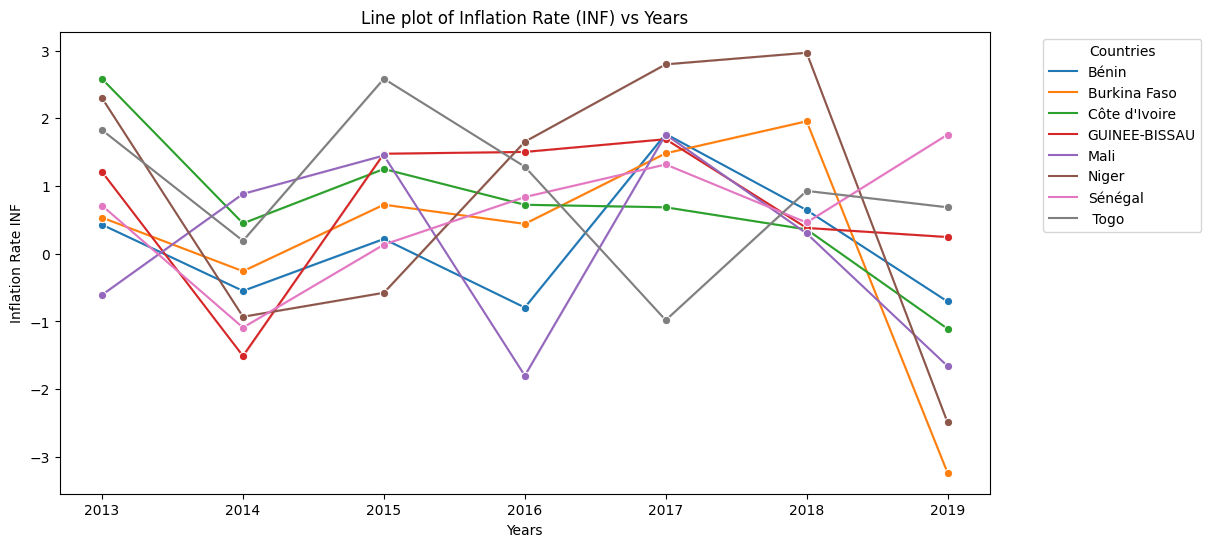

In [10]:
#lineplot for inflation(INF) vs years
plt.figure(figsize=(12, 6))
sns.lineplot(data=uemoa_df, x = 'Year', y = 'INF', hue = 'Countries', marker='o')
plt.title('Line plot of Inflation Rate (INF) vs Years')
plt.xlabel('Years')
plt.ylabel('Inflation Rate INF')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The observed inflation patterns reflect a nuanced interplay of diverse economic conditions, policy influences, and external factors across the UEMOA countries from 2013 to 2019. Various elements, including political stability, economic reforms, global economic trends, and specific country-level events, have likely contributed to the distinctive trajectories in inflation rates.

The fluctuations witnessed in each country may be intricately tied to their unique economic landscapes. For instance, instances of political stability or instability could have played a pivotal role, shaping the economic outlook and consequently influencing inflation trends. Similarly, the implementation of economic reforms might have triggered shifts in inflation dynamics, reflecting adjustments in fiscal policies or monetary measures.

#### Chart for Economic Risk Assessment(ERA) vs Years

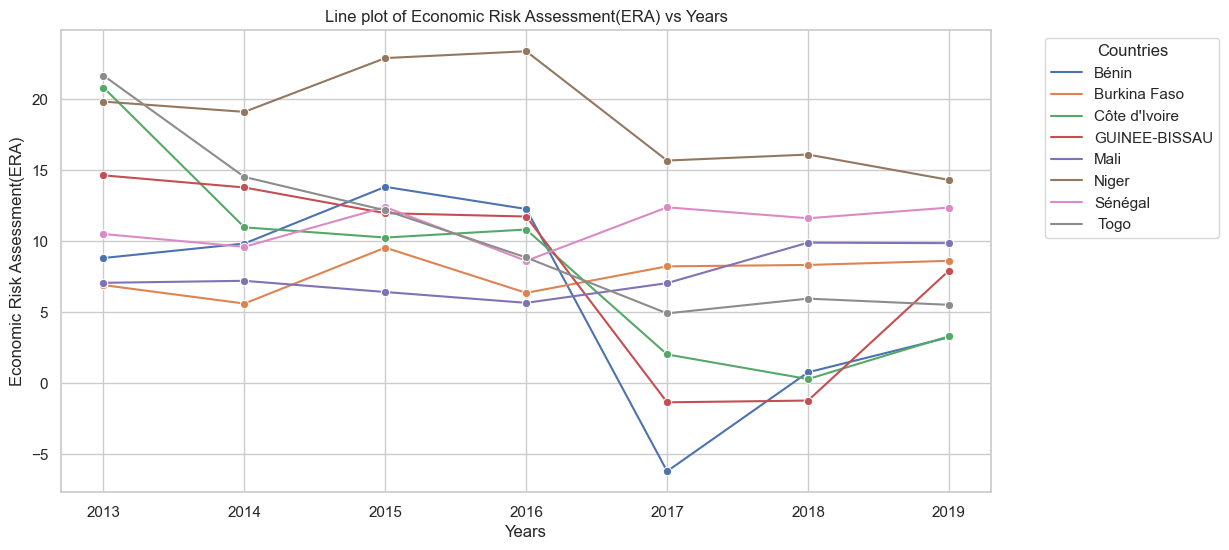

In [11]:
sns.set(style="whitegrid")
#lineplot for Economic Risk Assessment(ERA) vs years
plt.figure(figsize=(12, 6))
sns.lineplot(data=uemoa_df, x = 'Year', y = 'ERA', hue = 'Countries', marker='o',ci=None, linewidth=1.5)
plt.title('Line plot of Economic Risk Assessment(ERA) vs Years')
plt.xlabel('Years')
plt.ylabel('Economic Risk Assessment(ERA)')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Niger consistently exhibits a dominant Economic Risk Assessment (ERA) compared to other countries, maintaining scores predominantly above 15. This suggests a relatively stable economic environment in Niger throughout the years under consideration. In contrast, other countries generally fall within the range of 15 to 5 on the ERA scale. Notably, Benin, Guinea-Bissau, and Cote d'Ivoire experienced a temporary dip below 5 between 2016 and 2017. However, the chart indicates a positive trend, suggesting that these countries are on a trajectory towards recovery.

The observed ERA patterns in Benin, Guinea-Bissau, and Cote d'Ivoire between 2016 and 2017 may be attributed to specific economic events, policy changes, or external factors impacting these nations during that period. The subsequent upward trend indicates potential efforts or reforms aimed at stabilizing and improving their economic conditions.

The negative spike in Benin's Economic Risk Assessment (ERA) during 2016-2017 can be attributed to significant disruptions and uncertainties surrounding Banque Internationale du Bénin (BIBE). The government's intervention in March 2014, prompted by the bank's struggles with recapitalization and the isolation of historic shareholders, marked a critical turning point. Violations of banking laws, coupled with the withdrawal of approval by the UEMOA Banking Commission in December 2011 (postponed due to an appeal), led to the government assuming full control.

The subsequent modifications to BIBE's statutes in January 2016 revealed a shift in ownership, with the State becoming the sole shareholder. This change, combined with ongoing restructuring efforts, introduced uncertainties about the bank's financial stability, governance, and adherence to regulatory standards. Investors and stakeholders likely perceived these developments as significant risk factors, contributing to the observed negative ERA spike during the specified period. The ERA reflected the challenges and risks associated with the transition from mixed ownership to complete government control and the broader implications of the restructuring process.

#### Chart for Z score vs Years

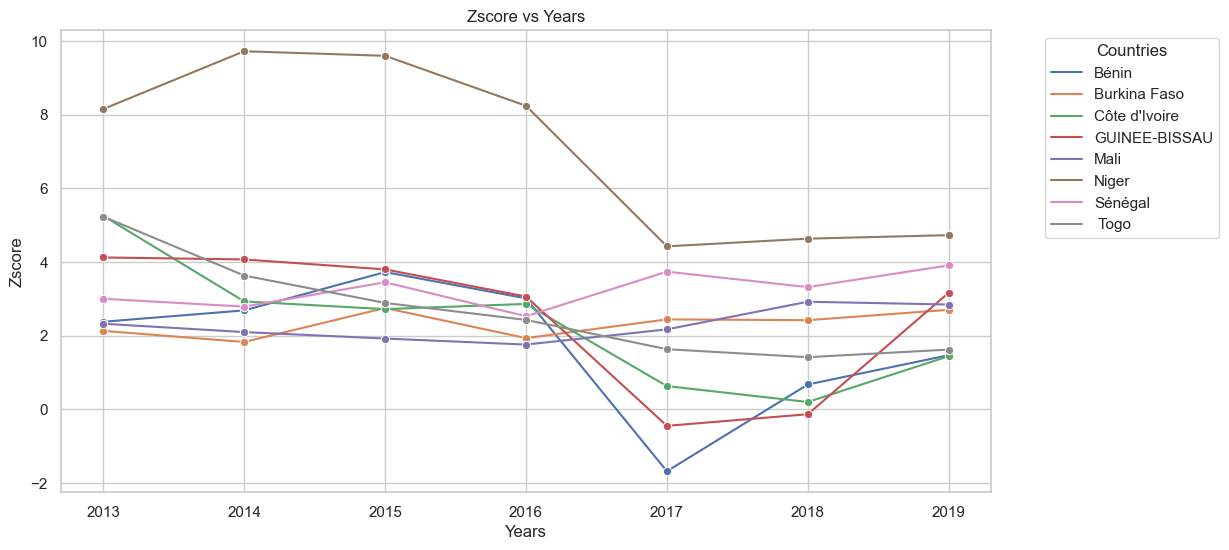

In [12]:
sns.set(style="whitegrid")
#lineplot for Z score vs years
plt.figure(figsize=(12, 6))
sns.lineplot(data=uemoa_df, x = 'Year', y = 'Zscore', hue = 'Countries', marker='o',ci=None, linewidth=1.5)
plt.title('Zscore vs Years')
plt.xlabel('Years')
plt.ylabel('Zscore')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Niger consistently exhibits the most dominant Z-score across all the years, with values consistently recorded above 4 on the chart. This suggests a robust and stable economic performance in Niger throughout the observed period. In contrast, the other countries predominantly fall within the range of 6 to 2 on the Z-score scale, with most years lying between 4 and 2. Notably, Benin and Guinea-Bissau experienced a temporary dip below 0 between 2016 and 2017, indicating a period of economic stress. However, both countries recovered afterward, reflecting resilience or corrective measures to address the economic challenges during that specific timeframe.

The Z-score serves as a valuable metric for assessing a country's financial health, and the observed patterns provide insights into the relative economic stability and challenges faced by each nation over the years.

#### Chart for Liquidity Risk vs Years

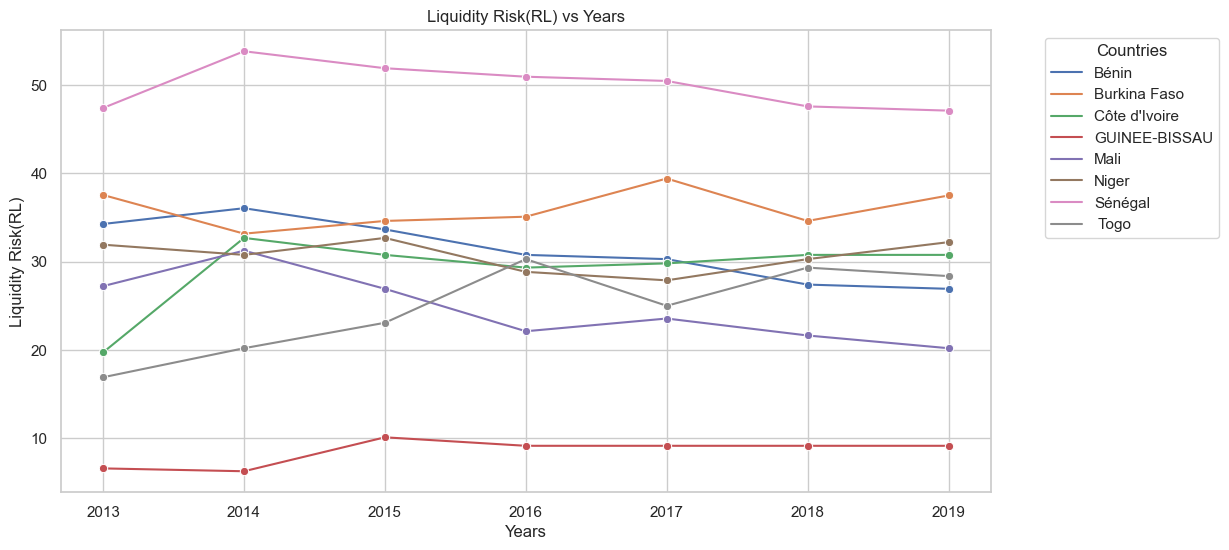

In [13]:
sns.set(style="whitegrid")
#lineplot for Liquidity Risk(RL) vs years
plt.figure(figsize=(12, 6))
sns.lineplot(data=uemoa_df, x = 'Year', y = 'RL', hue = 'Countries', marker='o',ci=None, linewidth=1.5)
plt.title('Liquidity Risk(RL) vs Years')
plt.xlabel('Years')
plt.ylabel('Liquidity Risk(RL)')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Senegal, as assessed by the IMF, is depicted as being at moderate risk of external and overall public debt distress. The debt indicators generally remain below risk thresholds under the baseline scenario, but marginal breaches in certain ratios highlight the urgency for Senegal to implement measures to bring external and total public debt onto a downward trajectory. The assessment emphasizes the importance of a strong macro-fiscal reform program to address these concerns.

Guinea-Bissau, on the other hand, is characterized as being at a high risk of external and overall debt distress. Despite this risk, debt is assessed as sustainable due to the authorities' commitment to sound policies supported by strong donor engagement. The regional context is considered supportive, reducing medium-term rollover risks associated with domestic debt. However, the debt outlook remains vulnerable to various factors, including a weaker economic recovery and a further tightening of global financial conditions.

These insights from the IMF reports provide a contextual backdrop for understanding the debt-related metrics in the chart. The chart's depiction of Risk of Liquidity (RL) can be seen as reflective of the underlying debt sustainability and distress assessments. Countries with better RL values may align with the IMF's acknowledgment of Senegal's moderate risk, while those with lower RL values may align with Guinea-Bissau's high risk. The sentiments expressed in the IMF reports contribute to the interpretation of the RL chart, emphasizing the critical role of debt management strategies in maintaining financial stability.

#### Chart for Debt vs Years

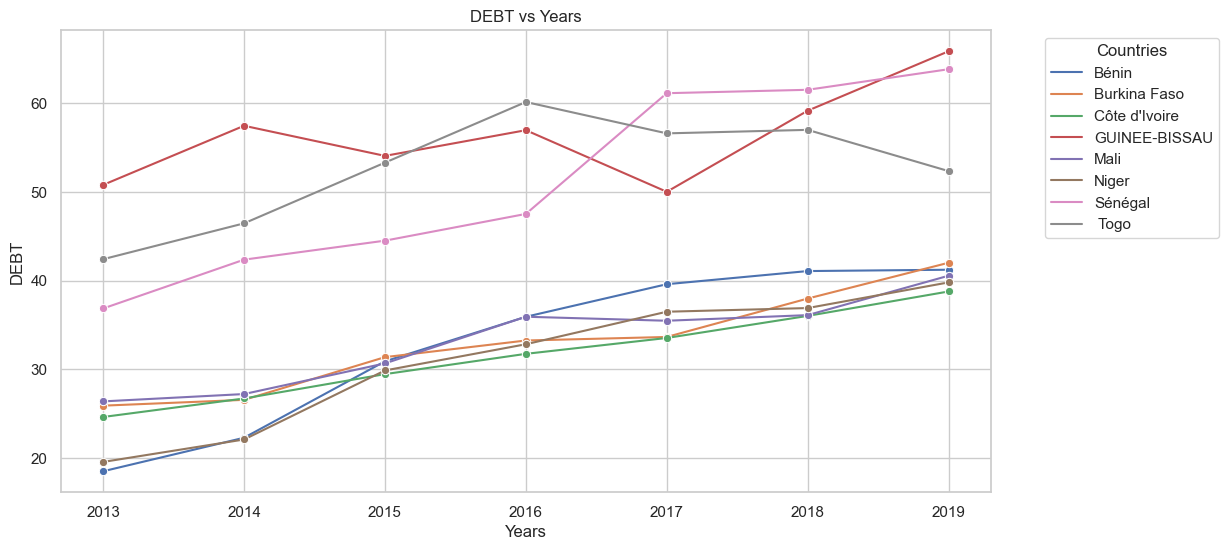

In [14]:
sns.set(style="whitegrid")
#lineplot for DEBT vs years
plt.figure(figsize=(12, 6))
sns.lineplot(data=uemoa_df, x = 'Year', y = 'DEBT', hue = 'Countries', marker='o',ci=None, linewidth=1.5)
plt.title('DEBT vs Years')
plt.xlabel('Years')
plt.ylabel('DEBT')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Banks in Senegal, Guinea-Bissau, and Togo consistently hold the highest debt amounts, with most values surpassing 40 on the chart. Senegal's debt has exhibited a persistent upward trend over the years, indicating a continuous accumulation of financial obligations, possibly driven by infrastructure investments or economic development projects. In contrast, Togo experienced steady debt growth from 2013 to 2016, followed by a noticeable decline persisting until 2019. This decline in Togo's debt is attributed to strategic debt management measures, including halting investment pre-financing and substituting related obligations with bonds at more favorable conditions.

Guinea-Bissau's debt demonstrated fluctuations between 2013 and 2017, followed by sustained growth leading up to 2019. The reasons for these trends could be linked to economic uncertainties or challenges in sustaining fiscal discipline within the country.

Conversely, other UEMOA countries depict a more uniform pattern, with debts starting in the 20s in 2013 and gradually reaching the high 30s or low 40s by 2019. This steady growth in debt for these countries suggests a consistent financial expansion or borrowing strategy over the analyzed period, possibly influenced by macroeconomic conditions, government fiscal policies, and external factors impacting the financial landscility.ses.

#### Chart for Inflation Rate(INF) vs Years

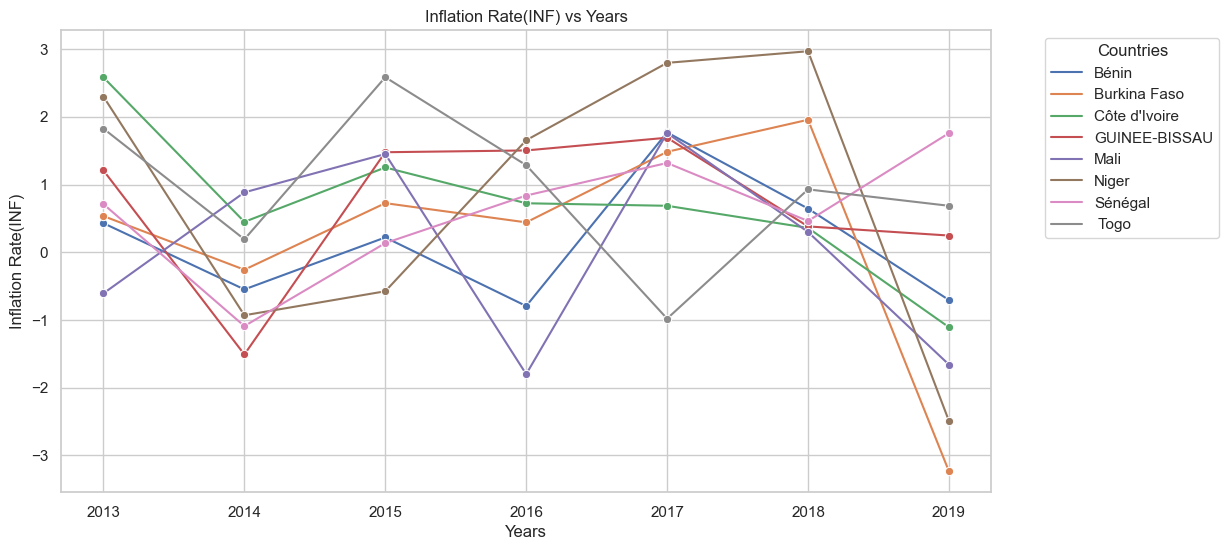

In [15]:
sns.set(style="whitegrid")
#lineplot for Inflation(INF) vs years
plt.figure(figsize=(12, 6))
sns.lineplot(data=uemoa_df, x = 'Year', y = 'INF', hue = 'Countries', marker='o',ci=None, linewidth=1.5)
plt.title('Inflation Rate(INF) vs Years')
plt.xlabel('Years')
plt.ylabel('Inflation Rate(INF)')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()